Regression models.

Description of the dataframe: https://www.kaggle.com/code/adveros/flight-delay-eda-exploratory-data-analysis

In [100]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import pingouin as pg
from sklearn import metrics
import numpy as np 
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [101]:
# Load dataframe
filename = 'C:/Users/Lucía Alvarez/OneDrive - psico.edu.uy/00 Barcelona activa/DelayedFlights.csv'
df = pd.read_csv(filename, sep=",", encoding="utf8") 

# Description of the dataframe

In [102]:
# Descriptive statistics of the dataframe
df.describe()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.936758e+06,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1.936758e+06,...,1.936758e+06,1.929648e+06,1.936303e+06,1.936758e+06,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,3.341651e+06,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.467473e+03,1.610141e+03,1.634225e+03,2.184263e+03,...,7.656862e+02,6.812975e+00,1.823220e+01,3.268348e-04,4.003598e-03,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,2.066065e+06,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,4.247668e+02,5.481781e+02,4.646347e+02,1.944702e+03,...,5.744797e+02,5.273595e+00,1.433853e+01,1.807562e-02,6.314722e-02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,0.000000e+00,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.517452e+06,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,6.100000e+02,...,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.242558e+06,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.543000e+03,...,6.060000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,4.972467e+06,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,3.422000e+03,...,9.980000e+02,8.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,7.009727e+06,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.742000e+03,...,4.962000e+03,2.400000e+02,4.220000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


Next, three variables were selected that could predict ArrDelay. For this, the variables were stored in a new dataframe in order to evaluate their correlations.

In [103]:
df_regression= df.iloc[:, [15, 25, 26, 29]]
df_regression

,ArrDelay,CarrierDelay,WeatherDelay,LateAircraftDelay
0,-14.0,NaN,NaN,NaN
1,2.0,NaN,NaN,NaN
2,14.0,NaN,NaN,NaN
3,34.0,2.0,0.0,32.0
4,11.0,NaN,NaN,NaN
...,...,...,...,...
1936753,25.0,3.0,0.0,22.0
1936754,75.0,0.0,57.0,0.0
1936755,99.0,1.0,0.0,79.0
1936756,9.0,NaN,NaN,NaN


In [104]:
#View which variables have missing values
df_regression.isna().sum()

ArrDelay               8387
CarrierDelay         689270
WeatherDelay         689270
LateAircraftDelay    689270
dtype: int64

In [105]:
#Eliminate cases with missing values of selected variables
df_regression.dropna(subset = ["ArrDelay","CarrierDelay","WeatherDelay", "LateAircraftDelay"], axis = 0, inplace = True)

#Correlation between variables of interest
corr_matrix = df_regression.corr(method='pearson')
corr_matrix


,ArrDelay,CarrierDelay,WeatherDelay,LateAircraftDelay
ArrDelay,1.000000,0.501773,0.264624,0.478123
CarrierDelay,0.501773,1.000000,-0.068951,-0.178286
WeatherDelay,0.264624,-0.068951,1.000000,-0.054971
LateAircraftDelay,0.478123,-0.178286,-0.054971,1.000000


ArrDelay is positively correlated with CarrierDelay, WeatherDelay and LateAircraftDelay.
The correlations range from .26 to .50.

In [106]:
#Calculate VIF of the variables of interest

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

X = df_regression.iloc[:,:-1]

round(calc_vif(X),3)

,variables,VIF
0,ArrDelay,1.853
1,CarrierDelay,1.682
2,WeatherDelay,1.166


The VIF values are in the expected range.
It is important to remember that a value between 1 and 5 indicates a moderate correlation between the variables in the model.
The VIF of the variables do not show high multicollinearity. Values that are not severe enough to require attention.

# Regression model 1: LateAircraftDelay 
LateAircraftDelay in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.


In [107]:
# Description of the variable to be predicted by ArrDelay
df.LateAircraftDelay.describe()

count    1.247488e+06
mean     2.529647e+01
std      4.205486e+01
min      0.000000e+00
25%      0.000000e+00
50%      8.000000e+00
75%      3.300000e+01
max      1.316000e+03
Name: LateAircraftDelay, dtype: float64

The following is the dot plot of the variables to be used in the regression model.

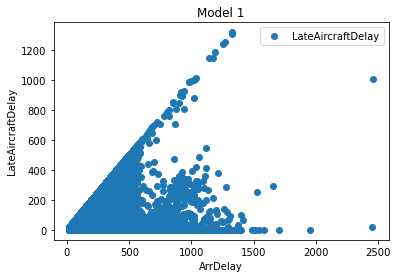

In [108]:
df.plot(x='ArrDelay', y='LateAircraftDelay', style='o')
plt.title('Model 1') 
plt.xlabel('ArrDelay') 
plt.ylabel('LateAircraftDelay') 
plt.show()

To test the different regression models, the predictor variable and the variable to be predicted will be stored in separate dataframes. 

In [109]:
Regression_1 = df.iloc[:, [15, 29]]

#Identify missing values
Regression_1.isnull().sum()

ArrDelay               8387
LateAircraftDelay    689270
dtype: int64

In [110]:
Regression_1.dropna(subset = ["ArrDelay", "LateAircraftDelay"], axis = 0, inplace = True)

Regression_1.isnull().sum()


ArrDelay             0
LateAircraftDelay    0
dtype: int64

In [111]:
#Standardization of the variables of interest
scaler = StandardScaler()
x_test_numericas = scaler.fit_transform(Regression_1)

Regression_1 = pd.DataFrame(Regression_1, columns=["ArrDelay", "LateAircraftDelay"])

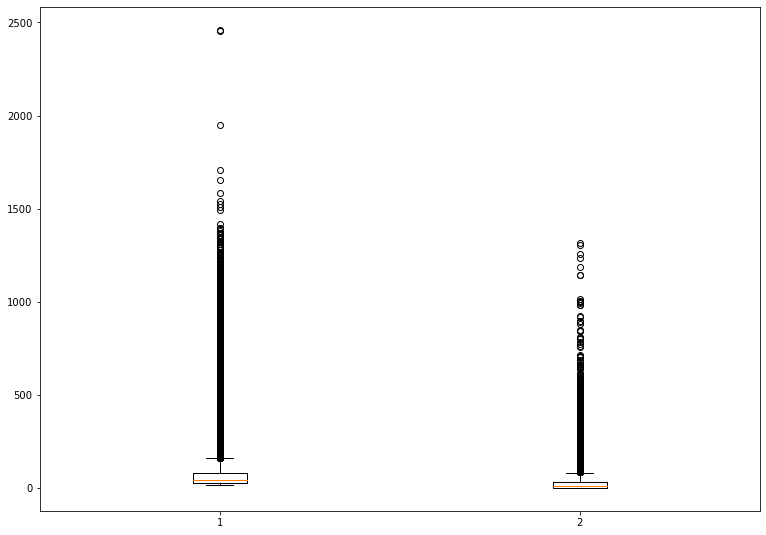

In [112]:
# Box plot of the transformed variables
fig = plt.figure(figsize =(10, 7)) 
  
ax = fig.add_axes([0, 0, 1, 1]) 
  
bp = ax.boxplot(Regression_1) 
  
plt.show() 

In [113]:
#Eliminate outliers of the variables of interest
Q1 = Regression_1.quantile (q = .25)
Q3 = Regression_1.quantile (q = .75)
IQR = Regression_1.apply (stats.iqr)

Regression_1_cleaned = Regression_1 [~ ((Regression_1 <(Q1-1.5 * IQR)) | (Regression_1> (Q3 + 1.5 * IQR))). any (axis = 1)]

Regression_1_cleaned.isnull().sum()

ArrDelay             0
LateAircraftDelay    0
dtype: int64

In [114]:
#Evaluate the correlations between  variables

display(pg.corr(Regression_1_cleaned['ArrDelay'], Regression_1_cleaned['LateAircraftDelay'], method='pearson'))

,n,r,CI95%,p-val,BF10,power
pearson,1096957,0.199781,"[0.2, 0.2]",0.0,inf,1.0


It is important to remember that the correlation between ArrDelay and LateAircraftDelay with missing values removed is 0.478123.

After standardizing the variables, removing outliers and missing values, a correlation of .20 was obtained.
We observe that the correlation between the variables decreases, so we could ask ourselves if the data processing between the variables was correct (hypothesizing that we expect the variables to have a positive association).


###### Regression model with LateAircraftDelay with cleaned data (transformed variables, without outliers and missing values).

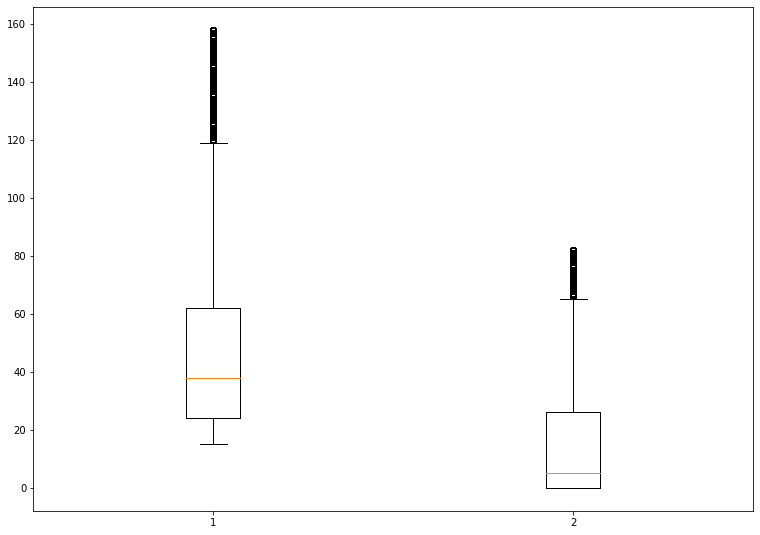

In [115]:
fig = plt.figure(figsize =(10, 7)) 
ax = fig.add_axes([0, 0, 1, 1])   
bp = ax.boxplot(Regression_1_cleaned) 
plt.show() 

In [116]:
X = Regression_1_cleaned['LateAircraftDelay'].values.reshape(-1,1)
y = Regression_1_cleaned['ArrDelay'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression() 
regressor.fit(X_train, y_train) 

#To obtain the intercept:
print(regressor.intercept_)

#To obtain the slope:
print(regressor.coef_)




[42.79207921]
[[0.29444715]]


The first 25 cases of the dataframe and the values predicted by the model are observed. 

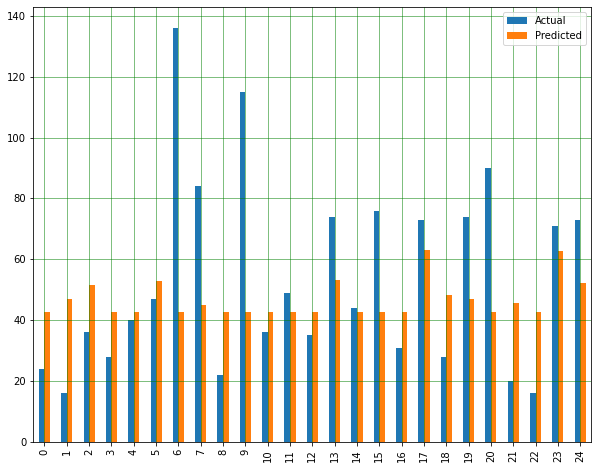

In [117]:
y_pred = regressor.predict(X_test)

df_cleaned = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_cleaned = df_cleaned.head(25)

df_cleaned.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

##### Next, we will evaluate the same model tested previously, but only with the transformed data (without taking outliers).

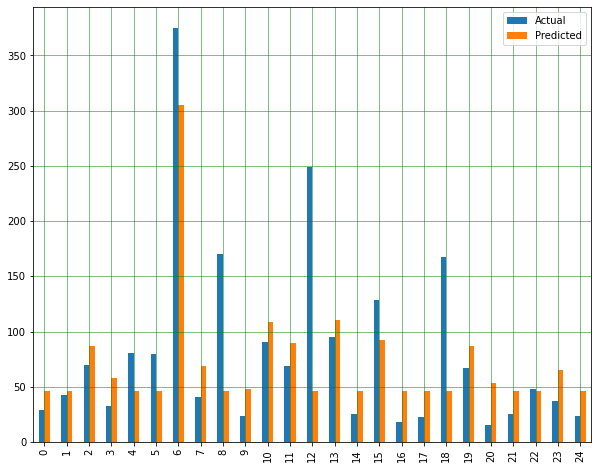

In [118]:
Xb = Regression_1['LateAircraftDelay'].values.reshape(-1,1)
yb = Regression_1['ArrDelay'].values.reshape(-1,1)

X_trainb, X_testb, y_trainb, y_testb = train_test_split(Xb, yb, test_size=0.2, random_state=0)

regressor = LinearRegression() 
regressor.fit(X_trainb, y_trainb) #Entrena el algoritmo 

y_predb = regressor.predict(X_testb)

df1_transformados = pd.DataFrame({'Actual': y_testb.flatten(), 'Predicted': y_predb.flatten()})
df1_transformados = df1_transformados.head(25)

df1_transformados.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [119]:
display(pg.corr(Regression_1['ArrDelay'], Regression_1['LateAircraftDelay'], method='pearson'))

,n,r,CI95%,p-val,BF10,power
pearson,1247488,0.478123,"[0.48, 0.48]",0.0,inf,1.0


##### Modelo 2: WeatherDelay 

WeatherDelay in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival

In [120]:
#Description of the variable that will predict ArrDelay
df.WeatherDelay.describe()

count    1.247488e+06
mean     3.703571e+00
std      2.149290e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.352000e+03
Name: WeatherDelay, dtype: float64

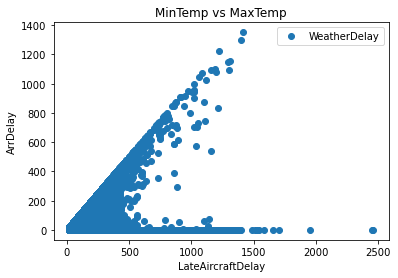

In [121]:
df.plot(x='ArrDelay', y='WeatherDelay', style='o')
plt.title('MinTemp vs MaxTemp') 
plt.xlabel('LateAircraftDelay') 
plt.ylabel('ArrDelay') 
plt.show()

In [122]:
Regresion_2= df.iloc[:, [15, 26]]

#Identify missing values
Regresion_2.isnull().sum()

ArrDelay          8387
WeatherDelay    689270
dtype: int64

In [123]:
Regresion_2.dropna(subset = ["ArrDelay", "WeatherDelay"], axis = 0, inplace = True)

Regresion_2.isnull().sum()

ArrDelay        0
WeatherDelay    0
dtype: int64

In [124]:
#Standardization of the variables of interest
scaler = StandardScaler()
x_test_numericas = scaler.fit_transform(Regresion_2)
Regresion_2_depurada = pd.DataFrame(Regresion_2, columns=["ArrDelay", "WeatherDelay"])

In [125]:

X2 = Regresion_2_depurada['WeatherDelay'].values.reshape(-1,1)
y2 = Regresion_2_depurada['ArrDelay'].values.reshape(-1,1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=0)


regressor = LinearRegression() 
regressor.fit(X_train2, y_train2)

print(regressor.intercept_)
print(regressor.coef_)

[60.55645828]
[[0.74848602]]


In [126]:
display(pg.corr(Regresion_2_depurada['ArrDelay'], Regresion_2_depurada['WeatherDelay'], method='pearson'))

,n,r,CI95%,p-val,BF10,power
pearson,1247488,0.264624,"[0.26, 0.27]",0.0,inf,1.0


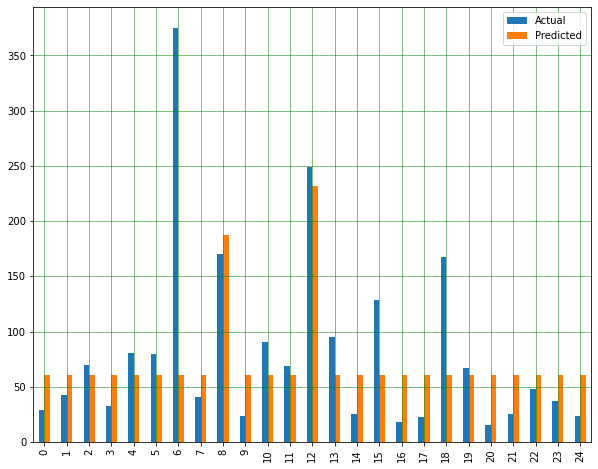

In [127]:
y_pred2 = regressor.predict(X_test2)

df_cleaned2 = pd.DataFrame({'Actual': y_test2.flatten(), 'Predicted': y_pred2.flatten()})
df_cleaned2 = df_cleaned2.head(25)
df_cleaned2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

##### Modelo 3: CarrierDelay 
CarrierDelay in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.

In [128]:
#Descripción de la variable que va a predecir a ArrDelay
df.CarrierDelay.describe()

count    1.247488e+06
mean     1.917940e+01
std      4.354621e+01
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+00
75%      2.100000e+01
max      2.436000e+03
Name: CarrierDelay, dtype: float64

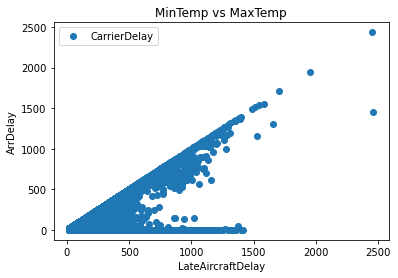

In [129]:
df.plot(x='ArrDelay', y='CarrierDelay', style='o')
plt.title('MinTemp vs MaxTemp') 
plt.xlabel('LateAircraftDelay') 
plt.ylabel('ArrDelay') 
plt.show()

In [130]:
Regresion_3= df.iloc[:, [15, 25]]

#Identify missing values

Regresion_3.isnull().sum()

ArrDelay          8387
CarrierDelay    689270
dtype: int64

In [131]:
Regresion_3.dropna(subset = ["ArrDelay", "CarrierDelay"], axis = 0, inplace = True)

Regresion_3.isnull().sum()

ArrDelay        0
CarrierDelay    0
dtype: int64

In [132]:
#Standardization of variables of interest
scaler = StandardScaler()
x_test_numericas = scaler.fit_transform(Regresion_3)
Regresion_3_depurada = pd.DataFrame(Regresion_3, columns=["ArrDelay", "CarrierDelay"])


In [133]:
display(pg.corr(Regresion_3_depurada['ArrDelay'], Regresion_3_depurada['CarrierDelay'], method='pearson'))

,n,r,CI95%,p-val,BF10,power
pearson,1247488,0.501773,"[0.5, 0.5]",0.0,inf,1.0


In [134]:
X3 = Regresion_3_depurada['CarrierDelay'].values.reshape(-1,1)
y3 = Regresion_3_depurada['ArrDelay'].values.reshape(-1,1)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=0)

regressor = LinearRegression() 
regressor.fit(X_train3, y_train3)

print(regressor.intercept_)
print(regressor.coef_)

[49.83432617]
[[0.70251205]]


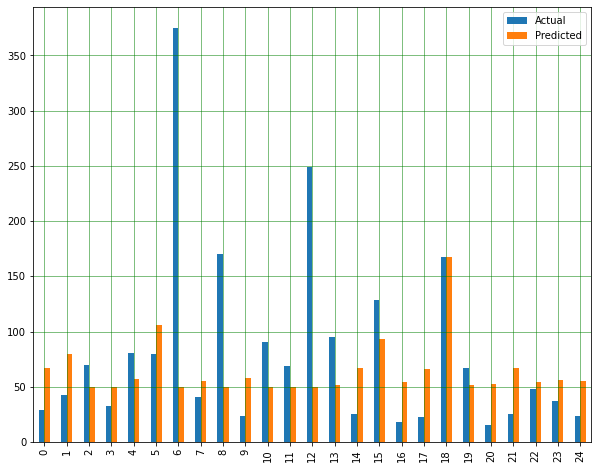

In [137]:
y_pred3 = regressor.predict(X_test3)
df_cleaned3 = pd.DataFrame({'Actual': y_test3.flatten(), 'Predicted': y_pred3.flatten()})
df_cleaned3 = df_cleaned3.head(25)

df_cleaned3.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


## Comparison of the models 

In [138]:
print('Model 1, with transformed data, no outliers and no missing values.: ')
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Model 1, with transformed data, no outliers and no missing values.: 
Mean Absolute Error (MAE): 22.54967064971508
Mean Squared Error (MSE): 885.5733523346388
Root Mean Squared Error (RMSE): 29.758584514970444


In [139]:
print('Model 1, with transformed data only: ')
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_testb, y_predb)) 
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_testb, y_predb)) 
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_testb, y_predb)))

Model 1, with transformed data only: 
Mean Absolute Error (MAE): 32.54120971683851
Mean Squared Error (MSE): 2794.893970875785
Root Mean Squared Error (RMSE): 52.866756765246954


In [140]:
print('Model 2, with transformed data only: ')
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test2, y_pred2)) 
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test2, y_pred2)) 
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))

Model 2, with transformed data only: 
Mean Absolute Error (MAE): 38.6130660744094
Mean Squared Error (MSE): 3364.3115498354628
Root Mean Squared Error (RMSE): 58.00268571226218


In [141]:
print('Model 3, with transformed data only: ')
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test3, y_pred3)) 
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test3, y_pred3)) 
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test3, y_pred3)))

Model 3, with transformed data only: 
Mean Absolute Error (MAE): 35.74823627491166
Mean Squared Error (MSE): 2751.5136898586247
Root Mean Squared Error (RMSE): 52.45487288954788


When comparing the models it is observed that the model "Model 1, with transformed data, no outliers and no missing values" reports:
- lower MAE compared to the rest of the models. This suggests that the model could be a suitable predictor for the results. Increasing MAE size indicates that the model might have problems in some area.
- lowest MSE of all the models. This indicates that it is the model with the lowest associated error.
- lowest RMSE
In sum, it could be inferred that the model with the transformed data, with no outliers and no missing values, is the one with the best fit indices. This highlights the importance of performing adequate data processing prior to data analysis.

### Recommended web pages
https://statologos.com/remove-outliers-python/

https://www.datasource.ai/es/data-science-articles/una-guia-para-principiantes-sobre-la-regresion-lineal-en-python-con-scikit-learn

https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/ch04.html#polynomial_regression_model_predictions